<a href="https://colab.research.google.com/github/phdcrivelaro/CALCULADORA-DE-CDG/blob/main/Histograma_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science - PhD Marcos Crivelaro - Histograma - Tabela com classes



Dataset - 100 Números Aleatórios (Tabela 10x10):
    0   1   2   3   4   5   6   7   8   9
0  52  93  15  72  61  21  83  87  75  75
1  88  24   3  22  53   2  88  30  38   2
2  64  60  21  33  76  58  22  89  49  91
3  59  42  92  60  80  15  62  62  47  62
4  51  55  64   3  51   7  21  73  39  18
5   4  89  60  14   9  90  53   2  84  92
6  60  71  44   8  47  35  78  81  36  50
7   4   2   6  54   4  54  93  63  18  90
8  44  34  74  62  14  95  48  15  72  78
9  87  62  40  85  80  82  53  24  26  89

Tabela de Frequência - Dados Agrupados em Classes:
  Intervalo de Frequência  Frequência
0                    2-11          13
1                   12-21          10
2                   22-31           6
3                   32-41           7
4                   42-51          10
5                   52-61          14
6                   62-71           9
7                   72-81          12
8                   82-91          14
9                  92-101           5


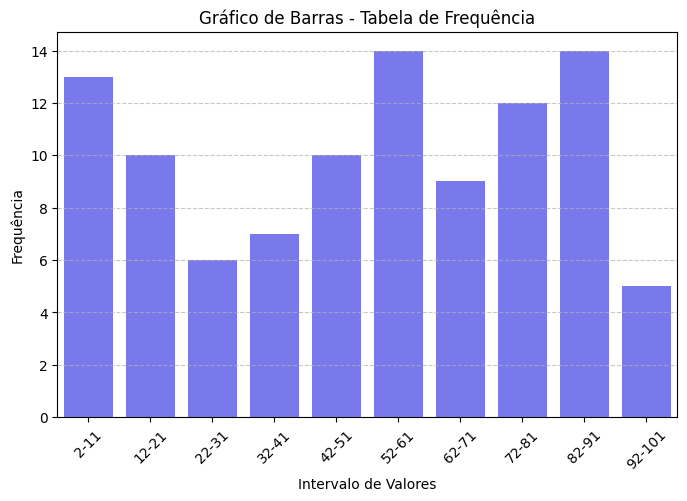

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar 100 números aleatórios entre 1 e 99
np.random.seed(42)  # Para reprodutibilidade
dados = np.random.randint(1, 100, 100)

# Criar um DataFrame com esses números
df = pd.DataFrame(dados, columns=['Valores'])

# Criar uma tabela 10x10 para exibição dos dados brutos
df_tabela = df.values.reshape(10, 10)
df_tabela = pd.DataFrame(df_tabela)

# Exibir o dataset em formato de tabela 10x10
print("\nDataset - 100 Números Aleatórios (Tabela 10x10):")
print(df_tabela)

# Definir o número de classes (k)
k = 10

# Calcular a amplitude total (AT)
AT = df['Valores'].max() - df['Valores'].min()

# Calcular a amplitude das classes (h)
h = math.ceil(AT / k)

# Definir os limites das classes
bins = list(range(int(df['Valores'].min()), int(df['Valores'].max()) + h, h))

# Criar labels para as classes
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Criar uma nova coluna com as classes de frequência
df['Classe_Frequencia'] = pd.cut(df['Valores'], bins=bins, labels=labels, right=False, include_lowest=True)

# Criar a tabela de frequência
tabela_frequencia = df['Classe_Frequencia'].value_counts().sort_index().reset_index()
tabela_frequencia.columns = ['Intervalo de Frequência', 'Frequência']

# Exibir a tabela de frequência
print("\nTabela de Frequência - Dados Agrupados em Classes:")
print(tabela_frequencia)

# Criar um gráfico de barras para a tabela de frequência
plt.figure(figsize=(8, 5))
sns.barplot(x='Intervalo de Frequência', y='Frequência', data=tabela_frequencia, color='blue', alpha=0.6)
plt.xticks(rotation=45)
plt.xlabel('Intervalo de Valores')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras - Tabela de Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
